## Bike sharing assignment

### Problem statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 




## Step 1 - Reading, understanding and visualizing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime  
from datetime import date 
import calendar

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.instant.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
## Drop column 'instant', as it does not contain any informative data, except from index number.

bike = bike.drop(['instant'], axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
bike.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [10]:
bike.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [11]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

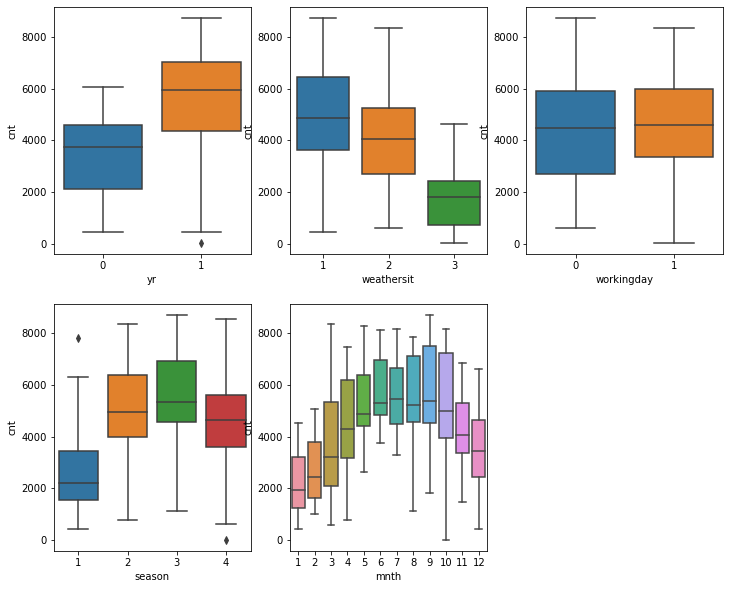

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bike)

plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(2,3,5)
sns.boxplot(x='mnth', y='cnt', data=bike)

plt.show()

##### Now check these box plot year-wise, just to be sure they look pretty similar

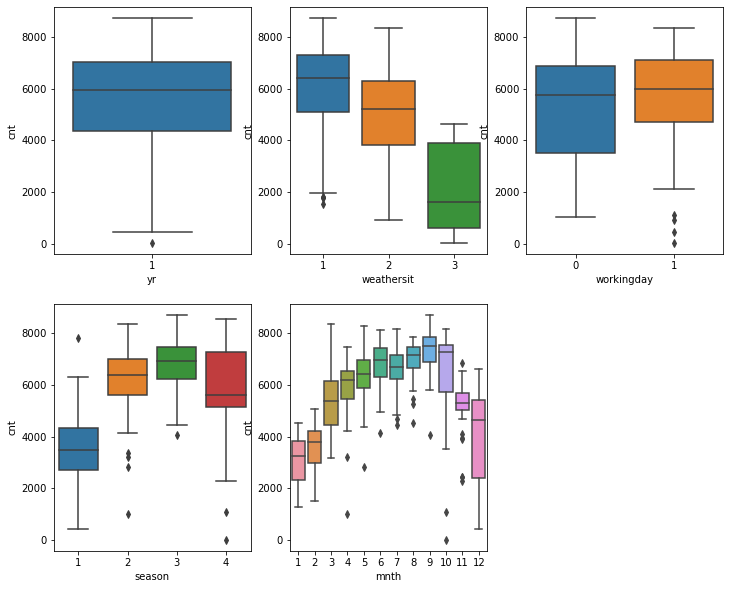

In [13]:
# For year 2019

bike_2019 = bike[bike["yr"] == 1]

plt.figure(figsize=(12, 10))

plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=bike_2019)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bike_2019)

plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='cnt', data=bike_2019)

plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data=bike_2019)

plt.subplot(2,3,5)
sns.boxplot(x='mnth', y='cnt', data=bike_2019)

plt.show()

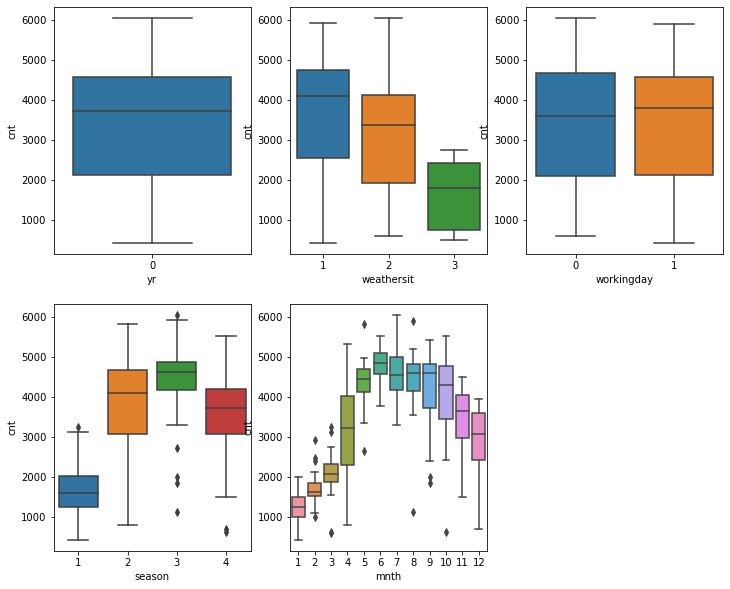

In [14]:
# For year 2018 
bike_2018 = bike[bike["yr"] == 0]

plt.figure(figsize=(12, 10))

plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=bike_2018)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bike_2018)

plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='cnt', data=bike_2018)

plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data=bike_2018)

plt.subplot(2,3,5)
sns.boxplot(x='mnth', y='cnt', data=bike_2018)

plt.show()

##### Scatter plot for few variables which looks important just from the intuition

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

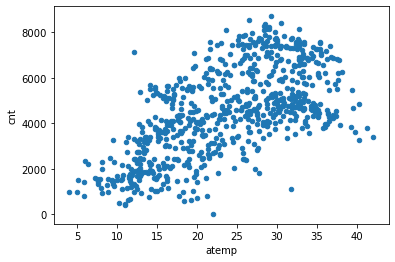

In [15]:
bike.plot(kind="scatter", x="atemp", y="cnt" )

<AxesSubplot:xlabel='temp', ylabel='cnt'>

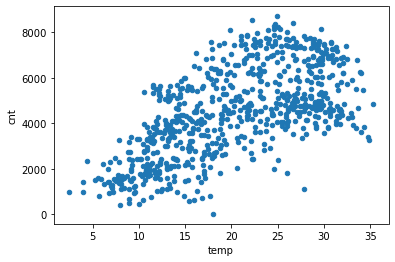

In [16]:
bike.plot(kind="scatter", x="temp", y="cnt" )

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

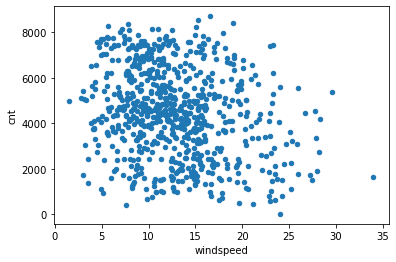

In [17]:
bike.plot(kind="scatter", x="windspeed", y="cnt" )

<AxesSubplot:xlabel='hum', ylabel='cnt'>

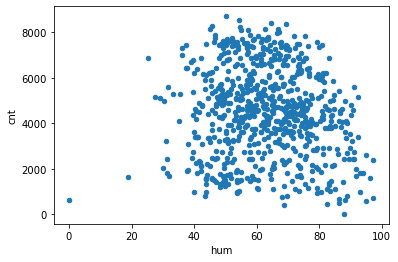

In [18]:
bike.plot(kind="scatter", x="hum", y="cnt" )

In [19]:
# Correlation matrix for 'cnt'
corr_matrix = bike.corr()
corr_matrix.cnt

season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

## Step 2 : Data Preparation

1. Encoding
2. Splitting into train and test
3. Rescaling of variables

In [20]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Remove columns which are 'not helpful in the model building' and 'carrying repetitive information' :
1. Columns carrying repetitive information - Sum of 'casual' and 'registered' is given in 'cnt'. As part of this model building, we are only interested in final count of bike rentals, and hence individual count of 'casual' and 'registered' rental can be dropped.
2. Not helpful columns - 'dteday' contains date and this too does not seem to add insight in our model building. Hence even this can be dropped.

In [21]:
bike = bike.drop(["dteday","casual","registered"], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.1 Encoding

First convert each categorical variable from numeric value to categorical value. Having a numeric value for a categorical variable will give wrong prediction result. 

In [22]:
# Let's first convert 'weekday' to its actual categorical value, i.e, day of the week. 
# In this case, it is not clear which numeric value of weekday points to which day of the week. 
# Let's try to find that out from the first record, which have 'dteday' as '01-01-2018' and 'weekday' as 6.

day_name = datetime.date(2018, 1, 1) 
print(day_name.strftime("%A")) 

Monday


In [23]:
# In this case, 6 stands for 'Monday', '5' will stand for 'Sunday' and likewise all '0' with stand for 'Tuesday'

weekoftheday = { 0: "Tue", 1: "Wed", 2: "Thurs", 3: "Fri", 4: "Sat", 5: "Sun", 6: "Mon"}
bike['weekday'] = bike['weekday'].apply(lambda x: weekoftheday[x])

#### Perform dummy encoding on categorical column.
When variables are converted to dummy variables, one column out total dummy columns becomes redundant. For example, for n categorical values, n-1 columns which give the required information. 

It was observed when dummy encoding is performed without 'drop_first=True', VIF comes infinite.

In [24]:
dayofweek = pd.get_dummies(bike["weekday"], drop_first=True)
dayofweek.head()

,Mon,Sat,Sun,Thurs,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
bike = pd.concat([bike,dayofweek], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tue,Wed
0,1,0,1,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0
1,1,0,1,0,Tue,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,1,0,1,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1
3,1,0,1,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,1,0,1,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0


In [26]:
#weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

weather = {1:"Sunny", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain" }
bike["weathersit"] = bike["weathersit"].apply(lambda x: weather[x])

In [27]:
weathersit = pd.get_dummies(bike.weathersit, drop_first=True)
bike = pd.concat([bike, weathersit], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tue,Wed,Light Rain,Sunny
0,1,0,1,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0
1,1,0,1,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,0,0
2,1,0,1,0,Wed,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1,0,1
3,1,0,1,0,Thurs,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,1
4,1,0,1,0,Fri,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,1


In [28]:

bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
month = pd.get_dummies(bike.mnth, drop_first=True)
bike = pd.concat([bike, month], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,1,0,Jan,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,1,0,Jan,0,Wed,1,Sunny,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,Jan,0,Thurs,1,Sunny,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,1,0,Jan,0,Fri,1,Sunny,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [29]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)

season_dict = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
bike["season"] = bike["season"].apply(lambda x: season_dict[x])
bike.season

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [30]:
season = pd.get_dummies(bike.season, drop_first=True)
bike = pd.concat([bike, season], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,0,0
1,spring,0,Jan,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,Jan,0,Wed,1,Sunny,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thurs,1,Sunny,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Sunny,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Now, as the categorical variables are converted to dummy variable, they can be dropped
bike = bike.drop(['mnth','weekday','weathersit','season'], axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Mon         730 non-null    uint8  
 9   Sat         730 non-null    uint8  
 10  Sun         730 non-null    uint8  
 11  Thurs       730 non-null    uint8  
 12  Tue         730 non-null    uint8  
 13  Wed         730 non-null    uint8  
 14  Light Rain  730 non-null    uint8  
 15  Sunny       730 non-null    uint8  
 16  Aug         730 non-null    uint8  
 17  Dec         730 non-null    uint8  
 18  Feb         730 non-null    uint8  
 19  Jan         730 non-null    u

### 2.2 Splitting the data into train-test

In [33]:
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100 )
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


### 2.3 Rescaling the Features

Here i am using Min-Max scaling (normalisation)

In [34]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,1,0,0,0,0,0,0,1,0


In [36]:
scaler = MinMaxScaler()

In [37]:
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

# For training data, fit_transform is used
bike_train[numeric_vars] = scaler.fit_transform(bike_train[numeric_vars])
bike_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,1,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,1,0,...,0,0,0,0,0,0,0,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.236424,0,0,...,0,0,1,0,0,0,0,0,1,0


In [38]:
# For test data, fit is never used. Using 'fit' on test data will make the model memorize it while fitting it,
# and it will not give right results
bike_test[numeric_vars] = scaler.transform(bike_test[numeric_vars])
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,0,...,0,0,0,1,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,0,1,0,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0.232858,0,0,...,0,0,1,0,0,0,0,1,0,0


## Step3: Training the model

In [39]:

bike_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,0.591433,-0.033817,-6.153420e-03,...,0.017623,0.017623,-0.005172,-0.025933,-0.018790,-0.025933,0.002574,-0.036320,0.018294,-0.027174
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.069242,9.759407e-03,...,-0.046539,-0.046539,-0.053321,-0.049076,0.127543,-0.004302,0.043692,0.053339,-0.063798,0.051582
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,-0.619074,2.465943e-01,...,-0.006030,0.009741,0.030677,0.059006,-0.041271,-0.046584,0.019495,-0.037932,0.046302,-0.060593
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,-0.042608,2.518482e-03,...,0.413678,0.301219,-0.179941,0.155168,-0.194994,-0.018286,0.207212,-0.606396,0.126057,-0.234200
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,-0.043785,6.021767e-03,...,0.406832,0.293970,-0.178698,0.161665,-0.185918,-0.005162,0.205900,-0.611118,0.136550,-0.211852
hum,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.040858,-3.853025e-02,...,-0.054070,-0.095077,-0.111040,0.145409,0.004676,0.167153,0.152439,-0.201616,-0.014192,0.173980
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,0.049063,-4.619727e-03,...,-0.085671,-0.033103,0.141944,-0.034342,0.009742,-0.018546,-0.121930,0.180351,0.110441,-0.090740
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,-0.015998,9.927716e-03,...,0.158087,0.195411,-0.137465,0.113276,-0.048002,0.055558,0.201639,-0.548987,0.140259,0.025945
Mon,-0.033817,-0.069242,-0.619074,-0.042608,-0.043785,-0.040858,0.049063,-0.015998,1.000000,-1.679261e-01,...,-0.000840,-0.000840,0.022870,-0.051896,-0.015744,0.006616,-0.006996,0.022641,-0.019069,0.018626
Sat,-0.006153,0.009759,0.246594,0.002518,0.006022,-0.038530,-0.004620,0.009928,-0.167926,1.000000e+00,...,-0.026046,-0.004341,0.045260,-0.015223,0.043827,-0.056742,0.032528,0.006275,-0.024073,-0.010699


<AxesSubplot:>

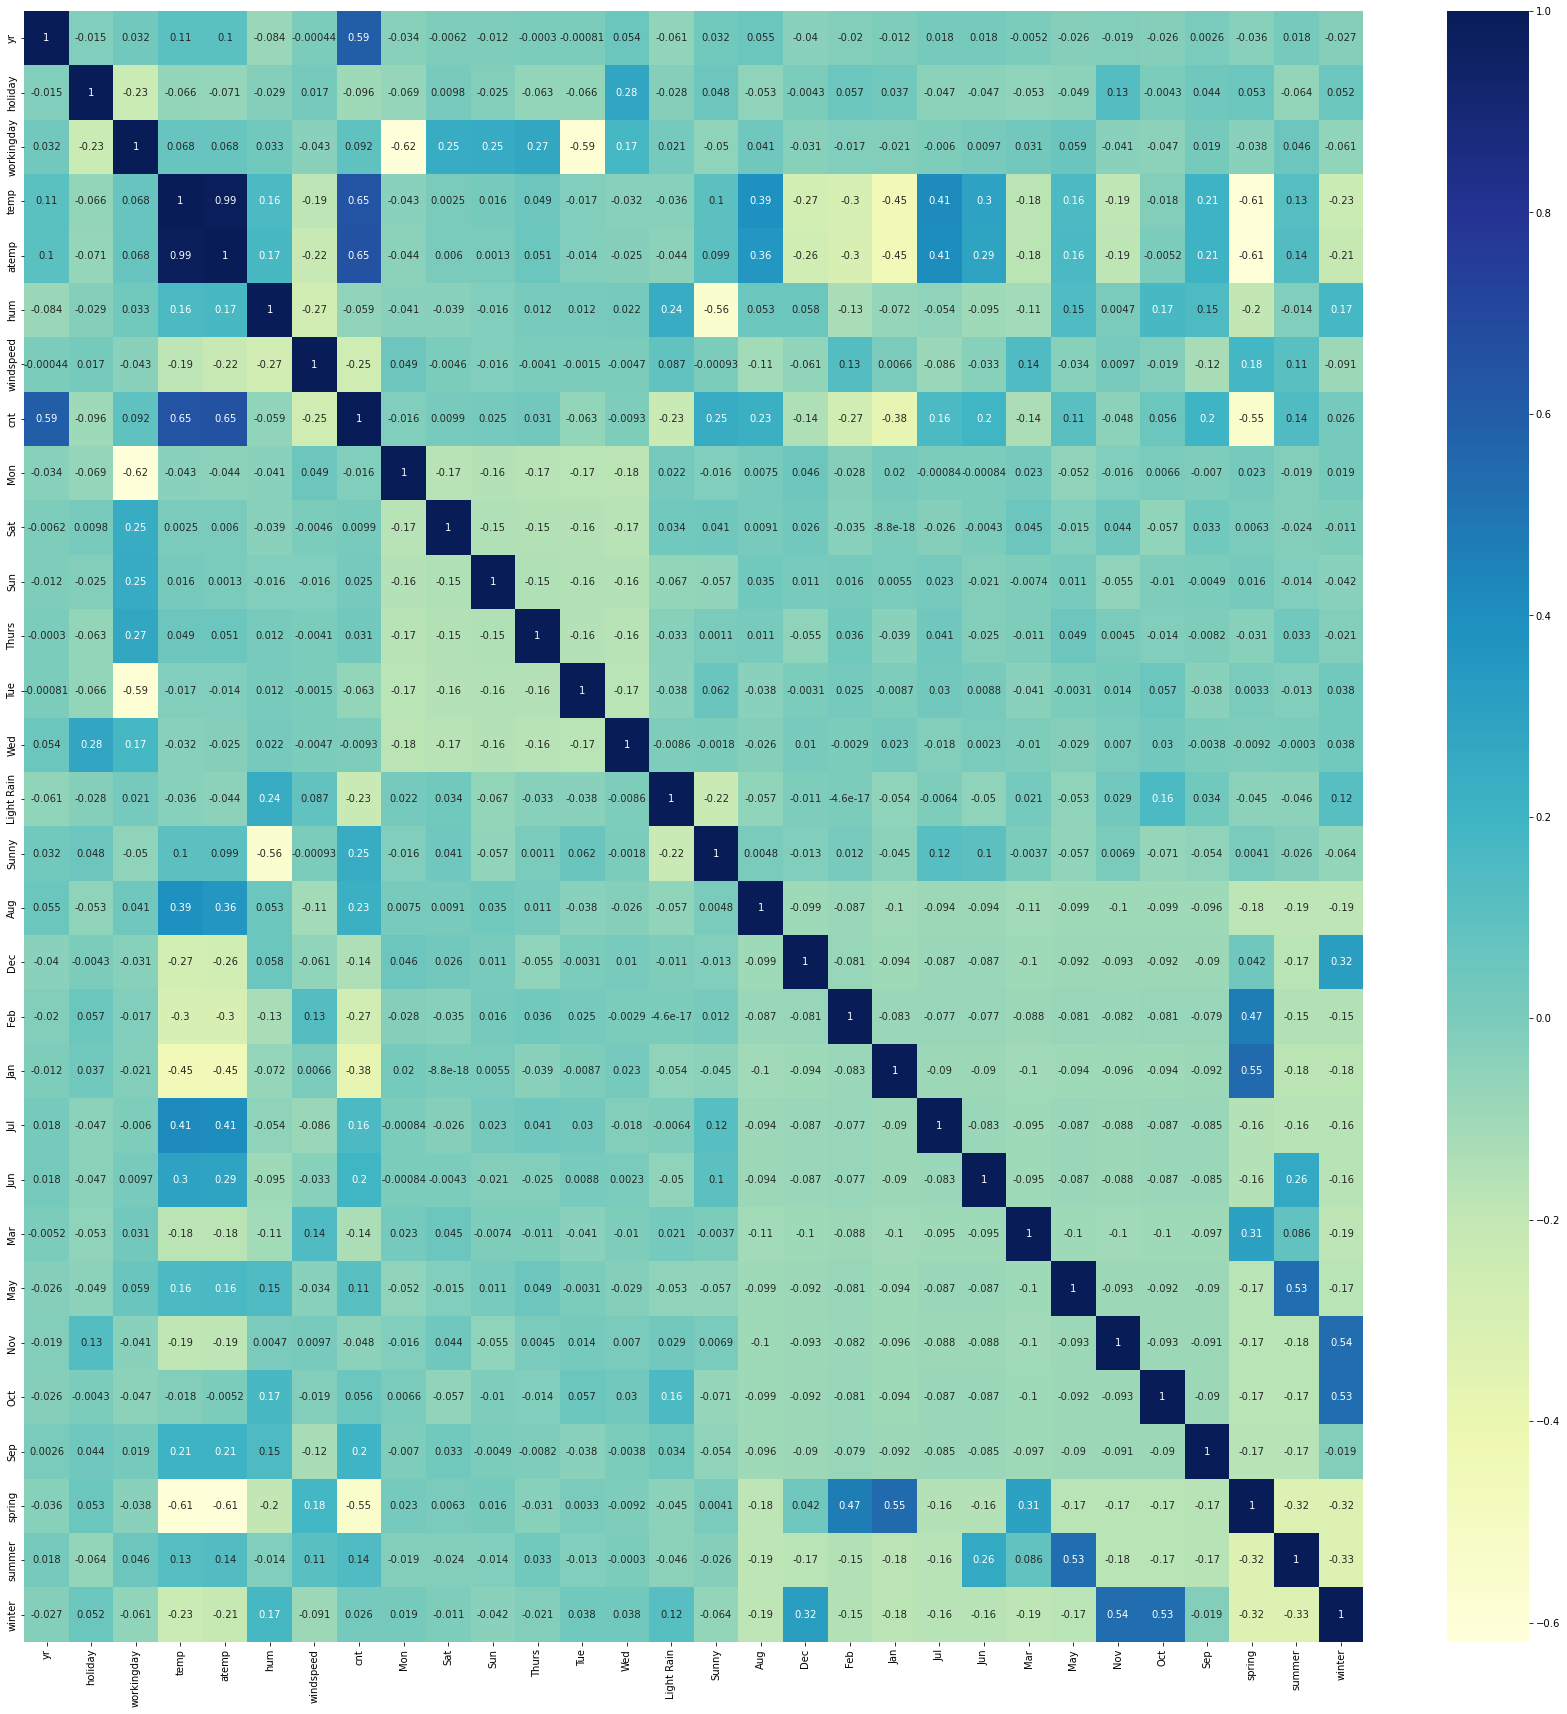

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(bike_train.corr(), annot=True, cmap='YlGnBu')

In [41]:
y_train=bike_train.pop('cnt')
X_train = bike_train

In [42]:
# from above heatmap, 'temp' and 'atemp' seems highly correlated and one out of it can be dropped to avoid multicollinearity issue.

X_train = X_train.drop(['temp'], axis=1)


In [43]:
X_train_sm = X_train[['atemp','hum']]
X_train_sm = sm.add_constant(X_train_sm)

lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.319925
atemp    0.715625
hum     -0.266960
dtype: float64

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.34e-66
Time:                        21:11:44   Log-Likelihood:                 190.92
No. Observations:                 510   AIC:                            -375.8
Df Residuals:                     507   BIC:                            -363.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3199      0.036      8.878      0.000       0.249       0.391
atemp          0.7156      0.035     20.250      0.000       0.646       0.785
hum           -0.2670      0.051     -5.187      0.000      -0.368      -0.166
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.091
Skew:                           0.058   Prob(JB):                        0.579
Kurtosis:                       2.806   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Here I am using 'top-down' approach for model building

In [45]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         0.207156
yr            0.234388
holiday       0.004025
workingday    0.083226
atemp         0.416044
hum          -0.145906
windspeed    -0.168331
Mon           0.087152
Sat          -0.004891
Sun           0.008192
Thurs        -0.013196
Tue           0.032754
Wed          -0.018092
Light Rain   -0.191841
Sunny         0.061167
Aug           0.041879
Dec          -0.052616
Feb          -0.040366
Jan          -0.073554
Jul          -0.014692
Jun           0.024234
Mar          -0.000344
May           0.036270
Nov          -0.045708
Oct           0.007606
Sep           0.095657
spring       -0.051922
summer        0.034816
winter        0.101506
dtype: float64

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.07e-179
Time:                        21:11:44   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2072      0.038      5.507      0.000       0.133       0.281
yr             0.2344      0.008     28.934      0.000       0.218       0.250
holiday        0.0040      0.025      0.164      0.870      -0.044       0.052
workingday     0.0832      0.012      6.676      0.000       0.059       0.108
atemp          0.4160      0.045      9.174      0.000       0.327       0.505
hum           -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed     -0.1683      0.026     -6.488      0.000      -0.219      -0.117
Mon            0.0872      0.014      6.275      0.000       0.060       0.114
Sat           -0.0049      0.015     -0.331      0.741      -0.034       0.024
Sun            0.0082      0.015      0.545      0.586      -0.021       0.038
Thurs         -0.0132      0.015     -0.889      0.374      -0.042       0.016
Tue            0.0328      0.014      2.297      0.022       0.005       0.061
Wed           -0.0181      0.015     -1.230      0.219      -0.047       0.011
Light Rain    -0.1918      0.025     -7.603      0.000      -0.241      -0.142
Sunny          0.0612      0.010      5.830      0.000       0.041       0.082
Aug            0.0419      0.033      1.257      0.209      -0.024       0.107
Dec           -0.0526      0.034     -1.560      0.120      -0.119       0.014
Feb           -0.0404      0.033     -1.221      0.223      -0.105       0.025
Jan           -0.0736      0.034     -2.188      0.029      -0.140      -0.007
Jul           -0.0147      0.035     -0.424      0.672      -0.083       0.053
Jun            0.0242      0.024      1.000      0.318      -0.023       0.072
Mar           -0.0003      0.025     -0.014      0.989      -0.049       0.048
May            0.0363      0.021      1.734      0.084      -0.005       0.077
Nov           -0.0457      0.037     -1.249      0.212      -0.118       0.026
Oct            0.0076      0.036      0.210      0.833      -0.063       0.079
Sep            0.0957      0.032      2.984      0.003       0.033       0.159
spring        -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer         0.0348      0.026      1.327      0.185      -0.017       0.086
winter         0.1015      0.028      3.612      0.000       0.046       0.157
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     7.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [47]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,workingday,95.85
6,Mon,21.76
10,Tue,20.47
25,spring,10.70
27,winter,9.41
26,summer,8.20
22,Nov,6.76
23,Oct,6.47
14,Aug,6.18
3,atemp,5.93


### Drop columns one by one based on following precedence:
1. High p-value, Low VIF
2. Low p-value, High VIF
3. High p-value, High VIF
4. Low p-value, low VIF

In [48]:
# Drop'Mar' - It have High p-value, Low VIF
X_train = X_train.drop(['Mar'], axis=1)

In [49]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.206987
yr            0.234389
holiday       0.003988
workingday    0.083180
atemp         0.416148
hum          -0.145949
windspeed    -0.168309
Mon           0.087105
Sat          -0.004899
Sun           0.008194
Thurs        -0.013196
Tue           0.032714
Wed          -0.018094
Light Rain   -0.191842
Sunny         0.061166
Aug           0.042041
Dec          -0.052319
Feb          -0.040028
Jan          -0.073204
Jul          -0.014540
Jun           0.024349
May           0.036376
Nov          -0.045438
Oct           0.007867
Sep           0.095847
spring       -0.052058
summer        0.034885
winter        0.101432
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed,

In [50]:
# Drop'Holiday' - It have High p-value, Low VIF
X_train = X_train.drop(['holiday' ], axis=1)

In [51]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.210974
yr            0.234389
workingday    0.079192
atemp         0.416148
hum          -0.145949
windspeed    -0.168309
Mon           0.083117
Sat          -0.004899
Sun           0.008194
Thurs        -0.013196
Tue           0.028727
Wed          -0.018094
Light Rain   -0.191842
Sunny         0.061166
Aug           0.042041
Dec          -0.052319
Feb          -0.040028
Jan          -0.073204
Jul          -0.014540
Jun           0.024349
May           0.036376
Nov          -0.045438
Oct           0.007867
Sep           0.095847
spring       -0.052058
summer        0.034885
winter        0.101432
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 16 Mar 2022   Prob (F-

In [52]:
# Drop'Oct' - It have High p-value, Low VIF
X_train = X_train.drop(['Oct'], axis=1)

In [53]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.213432
yr            0.234297
workingday    0.078649
atemp         0.416802
hum          -0.145020
windspeed    -0.168031
Mon           0.082617
Sat          -0.004930
Sun           0.008216
Thurs        -0.013238
Tue           0.028293
Wed          -0.018157
Light Rain   -0.191578
Sunny         0.061234
Aug           0.038946
Dec          -0.057025
Feb          -0.041329
Jan          -0.074446
Jul          -0.017665
Jun           0.022910
May           0.035811
Nov          -0.051646
Sep           0.092007
spring       -0.053551
summer        0.032376
winter        0.104713
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.

In [54]:
# Drop'Sat' - It have High p-value, Low VIF
X_train = X_train.drop(['Sat'], axis=1)

In [55]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.210398
yr            0.234318
workingday    0.079031
atemp         0.416601
hum          -0.144587
windspeed    -0.168054
Mon           0.085248
Sun           0.010466
Thurs        -0.011009
Tue           0.030910
Wed          -0.015870
Light Rain   -0.191470
Sunny         0.061199
Aug           0.039208
Dec          -0.057277
Feb          -0.041181
Jan          -0.074441
Jul          -0.017389
Jun           0.023186
May           0.035965
Nov          -0.051839
Sep           0.092168
spring       -0.053355
summer        0.032616
winter        0.105023
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.80e-183
Time:          

In [56]:
# Drop'Jul' - It have High p-value, Low VIF
X_train = X_train.drop(['Jul'], axis=1)

In [57]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.204316
yr            0.234516
workingday    0.078262
atemp         0.406662
hum          -0.142771
windspeed    -0.167347
Mon           0.083980
Sun           0.010215
Thurs        -0.011287
Tue           0.029807
Wed          -0.016049
Light Rain   -0.191375
Sunny         0.061414
Aug           0.052040
Dec          -0.057663
Feb          -0.042224
Jan          -0.076163
Jun           0.030446
May           0.038977
Nov          -0.051690
Sep           0.102052
spring       -0.044116
summer        0.041150
winter        0.114032
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.04e-183
Time:                        21:11:48 

In [58]:
# Drop'Sun' - It have High p-value, Low VIF
X_train = X_train.drop(['Sun'], axis=1)

In [59]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.209861
yr            0.234451
workingday    0.077983
atemp         0.405770
hum          -0.143621
windspeed    -0.167418
Mon           0.080574
Thurs        -0.014438
Tue           0.026407
Wed          -0.019202
Light Rain   -0.193404
Sunny         0.060817
Aug           0.051781
Dec          -0.057911
Feb          -0.042006
Jan          -0.076357
Jun           0.030135
May           0.039050
Nov          -0.052718
Sep           0.101366
spring       -0.044932
summer        0.040457
winter        0.113743
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.22e-184
Time:                        21:11:48   Log-Likelihood:      

In [60]:
# Drop'Thurs' - It have High p-value, Low VIF
X_train = X_train.drop(['Thurs'], axis=1)

In [61]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.208703
yr            0.234461
workingday    0.077029
atemp         0.404662
hum          -0.144735
windspeed    -0.167902
Mon           0.082988
Tue           0.028995
Wed          -0.015852
Light Rain   -0.191956
Sunny         0.060616
Aug           0.052337
Dec          -0.057226
Feb          -0.043243
Jan          -0.076520
Jun           0.031069
May           0.039182
Nov          -0.052642
Sep           0.102081
spring       -0.044472
summer        0.040299
winter        0.113537
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.04e-185
Time:                        21:11:49   Log-Likelihood:                 521.95
No. O

In [62]:
# Drop'Tue' - It have High p-value, Low VIF
X_train = X_train.drop(['Tue'], axis=1)

In [63]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.234832
yr            0.234746
workingday    0.052618
atemp         0.402767
hum          -0.143521
windspeed    -0.168006
Mon           0.057826
Wed          -0.019802
Light Rain   -0.192034
Sunny         0.060598
Aug           0.052160
Dec          -0.058092
Feb          -0.044271
Jan          -0.077423
Jun           0.031741
May           0.039505
Nov          -0.055288
Sep           0.100568
spring       -0.045380
summer        0.039648
winter        0.113555
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.84e-186
Time:                        21:11:50   Log-Likelihood:                 521.41
No. Observations:           

In [64]:
# Drop'Jun' - It have High p-value, Low VIF
X_train = X_train.drop(['Jun'], axis=1)

In [65]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.228666
yr            0.233958
workingday    0.052666
atemp         0.427001
hum          -0.149471
windspeed    -0.170645
Mon           0.058001
Wed          -0.019762
Light Rain   -0.192009
Sunny         0.060148
Aug           0.045604
Dec          -0.054923
Feb          -0.041141
Jan          -0.072633
May           0.027997
Nov          -0.052944
Sep           0.096310
spring       -0.043891
summer        0.047778
winter        0.113399
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.11e-186
Time:                        21:11:51   Log-Likelihood:                 519.78
No. Observations:                 510   AIC:       

In [66]:
# Drop'May' - It have High p-value, Low VIF
X_train = X_train.drop(['May'], axis=1)

In [67]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.216753
yr            0.233343
workingday    0.053048
atemp         0.436672
hum          -0.141479
windspeed    -0.172355
Mon           0.057554
Wed          -0.020558
Light Rain   -0.194089
Sunny         0.060431
Aug           0.045427
Dec          -0.053588
Feb          -0.039691
Jan          -0.070916
Nov          -0.051249
Sep           0.096199
spring       -0.039938
summer        0.059325
winter        0.115400
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.19e-187
Time:                        21:11:52   Log-Likelihood:                 518.44
No. Observations:                 510   AIC:                            -9

In [68]:
# Drop'Wed' - It have High p-value, Low VIF
X_train = X_train.drop(['Wed'], axis=1)

In [69]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.215418
yr            0.232548
workingday    0.051319
atemp         0.438703
hum          -0.143634
windspeed    -0.173062
Mon           0.059819
Light Rain   -0.193285
Sunny         0.060001
Aug           0.046009
Dec          -0.053404
Feb          -0.040045
Jan          -0.071878
Nov          -0.050478
Sep           0.096520
spring       -0.038816
summer        0.059633
winter        0.114917
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.28e-187
Time:                        21:11:52   Log-Likelihood:                 516.73
No. Observations:                 510   AIC:                            -997.5
Df Residuals:     

In [70]:
# Drop'spring' - It have High p-value, Low VIF
X_train = X_train.drop(['spring'], axis=1)

In [71]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.183715
yr            0.231707
workingday    0.051143
atemp         0.476286
hum          -0.151813
windspeed    -0.176885
Mon           0.059340
Light Rain   -0.189810
Sunny         0.058896
Aug           0.057549
Dec          -0.052525
Feb          -0.050031
Jan          -0.079205
Nov          -0.046317
Sep           0.106763
summer        0.078037
winter        0.135704
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.22e-188
Time:                        21:11:53   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   B

In [72]:
# Drop'Feb' - It have High p-value, Low VIF
X_train = X_train.drop(['Feb'], axis=1)

In [73]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.153515
yr            0.230912
workingday    0.051840
atemp         0.514190
hum          -0.157650
windspeed    -0.175784
Mon           0.060877
Light Rain   -0.186615
Sunny         0.058126
Aug           0.063264
Dec          -0.038599
Jan          -0.053457
Nov          -0.037766
Sep           0.113490
summer        0.090369
winter        0.146306
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.36e-188
Time:                        21:11:54   Log-Likelihood:                 512.23
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     494   BIC:                    

In [74]:
# Drop'Nov' - It have High p-value, Low VIF
X_train = X_train.drop(['Nov'], axis=1)

In [75]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.145464
yr            0.230963
workingday    0.052236
atemp         0.524181
hum          -0.156653
windspeed    -0.175495
Mon           0.061693
Light Rain   -0.183734
Sunny         0.057545
Aug           0.063013
Dec          -0.024990
Jan          -0.048271
Sep           0.116961
summer        0.091918
winter        0.132300
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.05e-188
Time:                        21:11:54   Log-Likelihood:                 510.08
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     495   BIC:                            -926.6
Df Model

In [76]:
# Drop'Dec' - It have High p-value, Low VIF
X_train = X_train.drop(['Dec'], axis=1)

In [77]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.140448
yr            0.230870
workingday    0.051581
atemp         0.535687
hum          -0.162506
windspeed    -0.172014
Mon           0.060364
Light Rain   -0.180823
Sunny         0.056611
Aug           0.063807
Jan          -0.041914
Sep           0.119257
summer        0.094228
winter        0.130271
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.87e-189
Time:                        21:11:55   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                      

In [78]:
# Drop'Jan' - It have High p-value, Low VIF
X_train = X_train.drop(['Jan'], axis=1)

In [79]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const         0.120383
yr            0.229842
workingday    0.051375
atemp         0.563932
hum          -0.169625
windspeed    -0.165098
Mon           0.059829
Light Rain   -0.177068
Sunny         0.056491
Aug           0.066667
Sep           0.122294
summer        0.101303
winter        0.141299
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.65e-189
Time:                        21:11:55   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                 

In [80]:
# Drop'Mar' - It have Low p-value, High VIF

X_train = X_train.drop(['hum'], axis=1)

In [81]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const        -0.005784
yr            0.233696
workingday    0.054355
atemp         0.540858
windspeed    -0.133705
Mon           0.064770
Light Rain   -0.196500
Sunny         0.083696
Aug           0.064985
Sep           0.116346
summer        0.098699
winter        0.131978
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.15e-186
Time:                        21:11:56   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                        

## Step 4 - Residual Analysis

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

In [82]:
y_train_predict = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

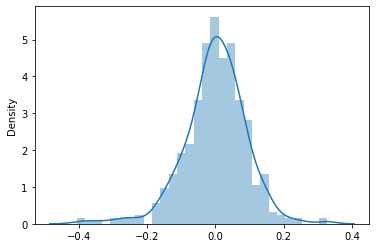

In [83]:
residual = y_train - y_train_predict
sns.distplot(residual)

## Step 5: Predictions and evaluations on test set

Pre-processing done on training data set before model, same pre-processing has to be done on test data set. Otherwise the results given by test data set will be incorrect.

In [84]:
scaler = MinMaxScaler()
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,1,0,0,0,0,0,0,1,0


In [85]:
#bike_test[numeric_vars] = scaler.transform(bike_test[numeric_vars])
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,0,...,0,0,0,1,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,0,1,0,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0.232858,0,0,...,0,0,1,0,0,0,0,1,0,0


In [86]:
y_test = bike_test.pop('cnt')

In [87]:
X_test = bike_test

In [88]:
#add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Mon,Sat,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,1,0,0,0,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,1,...,0,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,1,0,0,0,0,0,0,1,0


In [89]:
# Drop all independent variabls from test data set, which are not part of train data set.
X_test_sm = X_test_sm.drop(['temp', 'Mar','holiday','Oct','Sat', 'Jul','Sun', 'Thurs', 'Tue','Jun', 'May', 'Wed', 'spring', 'Feb','Nov', 'Dec', 'Jan', 'hum'],axis=1)

X_test_sm.shape


(220, 12)

In [90]:
X_test_sm.head()

,const,yr,workingday,atemp,windspeed,Mon,Light Rain,Sunny,Aug,Sep,summer,winter
184,1.0,0,0,0.769660,0.084219,0,0,0,0,0,0,0
535,1.0,1,1,0.842587,0.153728,0,0,1,0,0,1,0
299,1.0,0,1,0.496145,0.334206,0,0,0,0,0,0,1
221,1.0,0,1,0.795343,0.339570,0,0,1,1,0,0,0
152,1.0,0,1,0.741471,0.537414,0,0,1,0,0,1,0


In [91]:
y_test_pred = lr_model.predict(X_test_sm)

In [92]:
from sklearn.metrics import r2_score

In [93]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7991400079632174

- R squared of train data set - 0.833
- R squared of test data set - 0.799
- Difference between train data set and test data set is ~0.034
- ~0.034 or 3.4% is less than 5% or 0.05. Hence it can be said it is a good model.